<a href="https://colab.research.google.com/github/BHUVANESWARI-2005/Super-Store-Sales-Prediction/blob/main/Superstore_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
superstore_data = pd.read_csv("/content/train.csv")
superstore_data.shape

(9800, 18)

In [ ]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
superstore_data.drop(columns= ['Row ID'], inplace=True)
#check for null values
superstore_data.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
superstore_data[superstore_data['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
superstore_data['Postal Code']= superstore_data['Postal Code'].fillna('5401')

In [ ]:
superstore_data['Order Date']=pd.to_datetime(superstore_data['Order Date'],format='%d/%m/%Y')
superstore_data['Ship Date']=pd.to_datetime(superstore_data['Ship Date'],format='%d/%m/%Y')
superstore_data['Postal Code']=superstore_data['Postal Code'].astype(str).apply(lambda x: x.split('.')[0])
superstore_data['Sales']=round(superstore_data['Sales'], 2)
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   object        
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [ ]:
def add_leading_zero(postal_code):
    if len(postal_code) != 5:
        return '0' + postal_code
    return postal_code

# apply the function to the 'Postal Code' column
superstore_data['Postal Code'] = superstore_data['Postal Code'].apply(add_leading_zero)
#create a Ship Time column
superstore_data['Ship Time']= (superstore_data['Ship Date']- superstore_data['Order Date']).dt.days

In [ ]:
superstore_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ship Time
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,7


In [ ]:
superstore_data.describe()

,Sales,Ship Time
count,9800.000000,9800.000000
mean,230.769036,3.961122
std,626.651878,1.749614
min,0.440000,0.000000
25%,17.250000,3.000000
50%,54.490000,4.000000
75%,210.605000,5.000000
max,22638.480000,7.000000


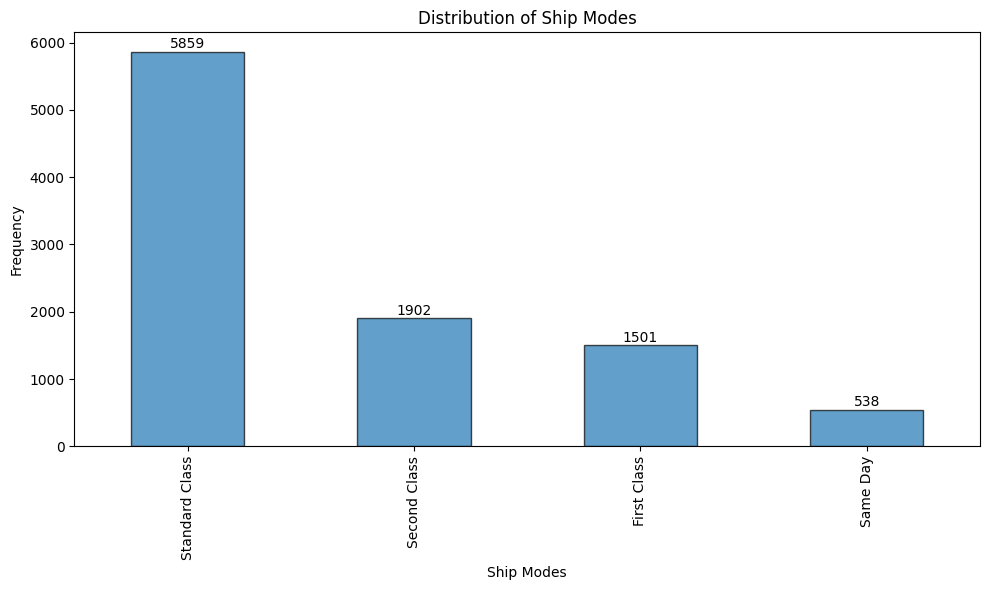

In [ ]:
ship_modes = superstore_data['Ship Mode']

ship_mode_counts = ship_modes.value_counts()

#create a bar chart
plt.figure(figsize=(10, 6))
ship_mode_counts.plot(kind='bar', edgecolor='black', alpha=0.7)

#add text labels with the exact sales values on top of each bar
for x, y in enumerate(ship_mode_counts):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=10)

#customize the graph
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Modes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

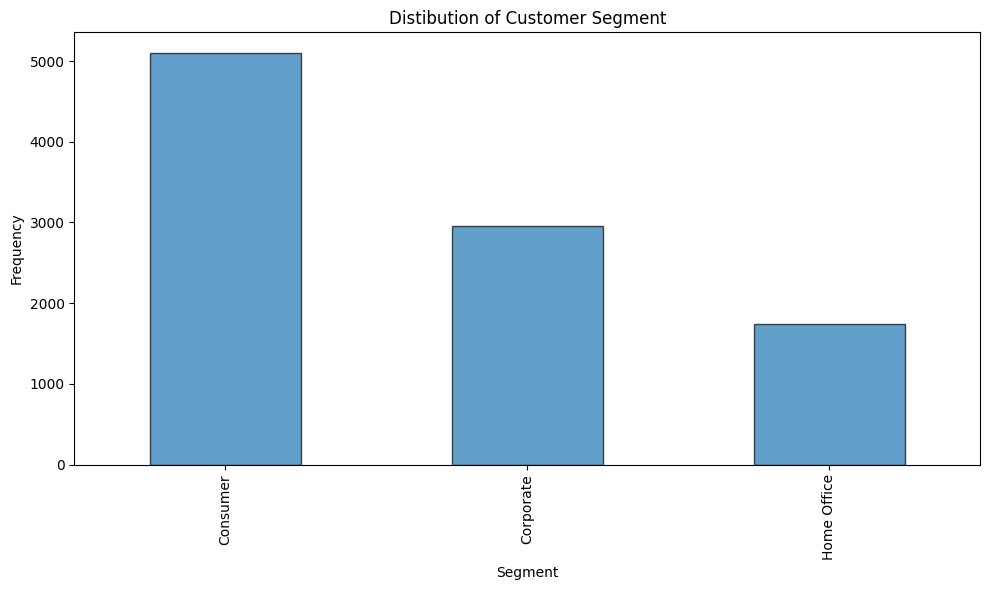

In [ ]:
segment_dist=superstore_data['Segment'].value_counts()

#create a bar chart
plt.figure(figsize=(10,6))
segment_dist.plot(kind='bar', edgecolor='black', alpha=0.7)

#customize the graph
plt.title('Distibution of Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

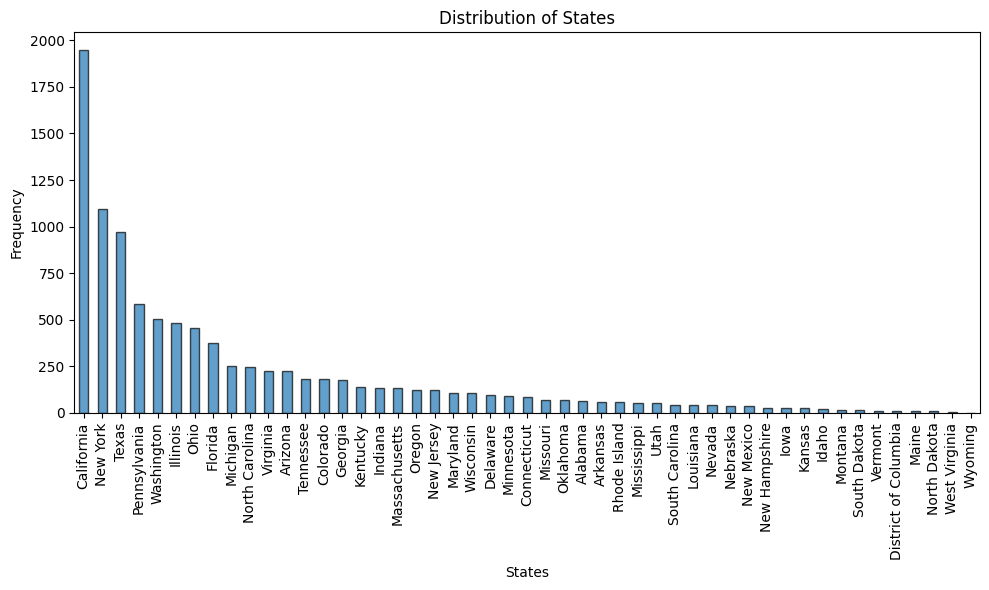

In [ ]:
state_dist=superstore_data['State'].value_counts()

#create a bar chart
plt.figure(figsize=(10,6))
state_dist.plot(kind='bar', edgecolor='black', alpha=0.7)

#customize the graph
plt.title('Distribution of States')
plt.xlabel('States')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

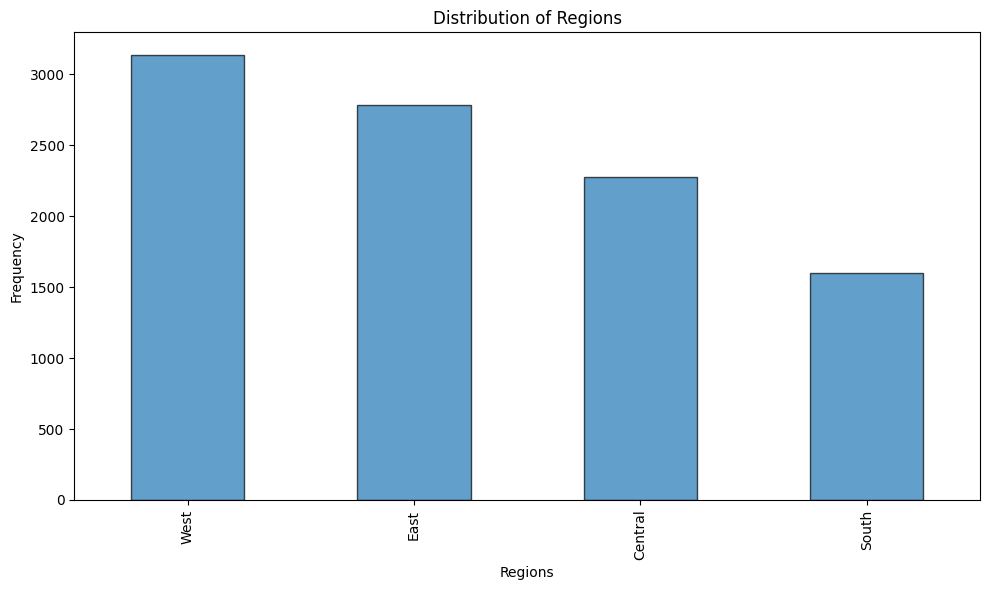

In [ ]:
region_dist=superstore_data['Region'].value_counts()

#create a bar chart
plt.figure(figsize=(10,6))
region_dist.plot(kind='bar', edgecolor='black', alpha=0.7)

#customize the graph
plt.title('Distribution of Regions')
plt.xlabel('Regions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

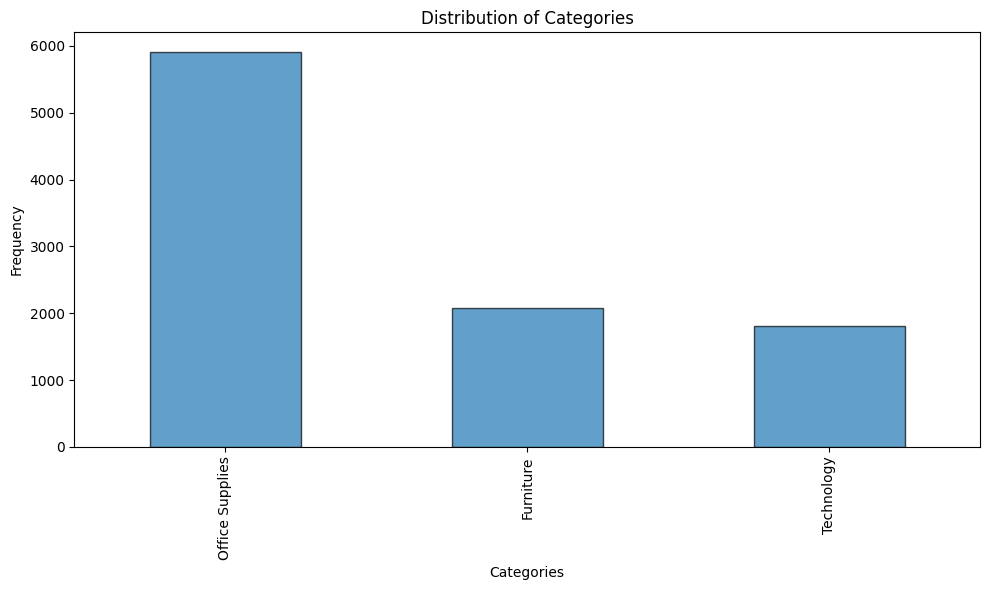

In [ ]:
cat_dist=superstore_data['Category'].value_counts()

#create a bar chart
plt.figure(figsize=(10,6))
cat_dist.plot(kind='bar', edgecolor='black', alpha=0.7)

#customize the graph
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
total_revenue = superstore_data['Sales'].sum()
total_orders= superstore_data['Order ID'].count()
average_order_value= total_revenue/total_orders
average_order_value

230.7690357142857

Customers generate more revenue

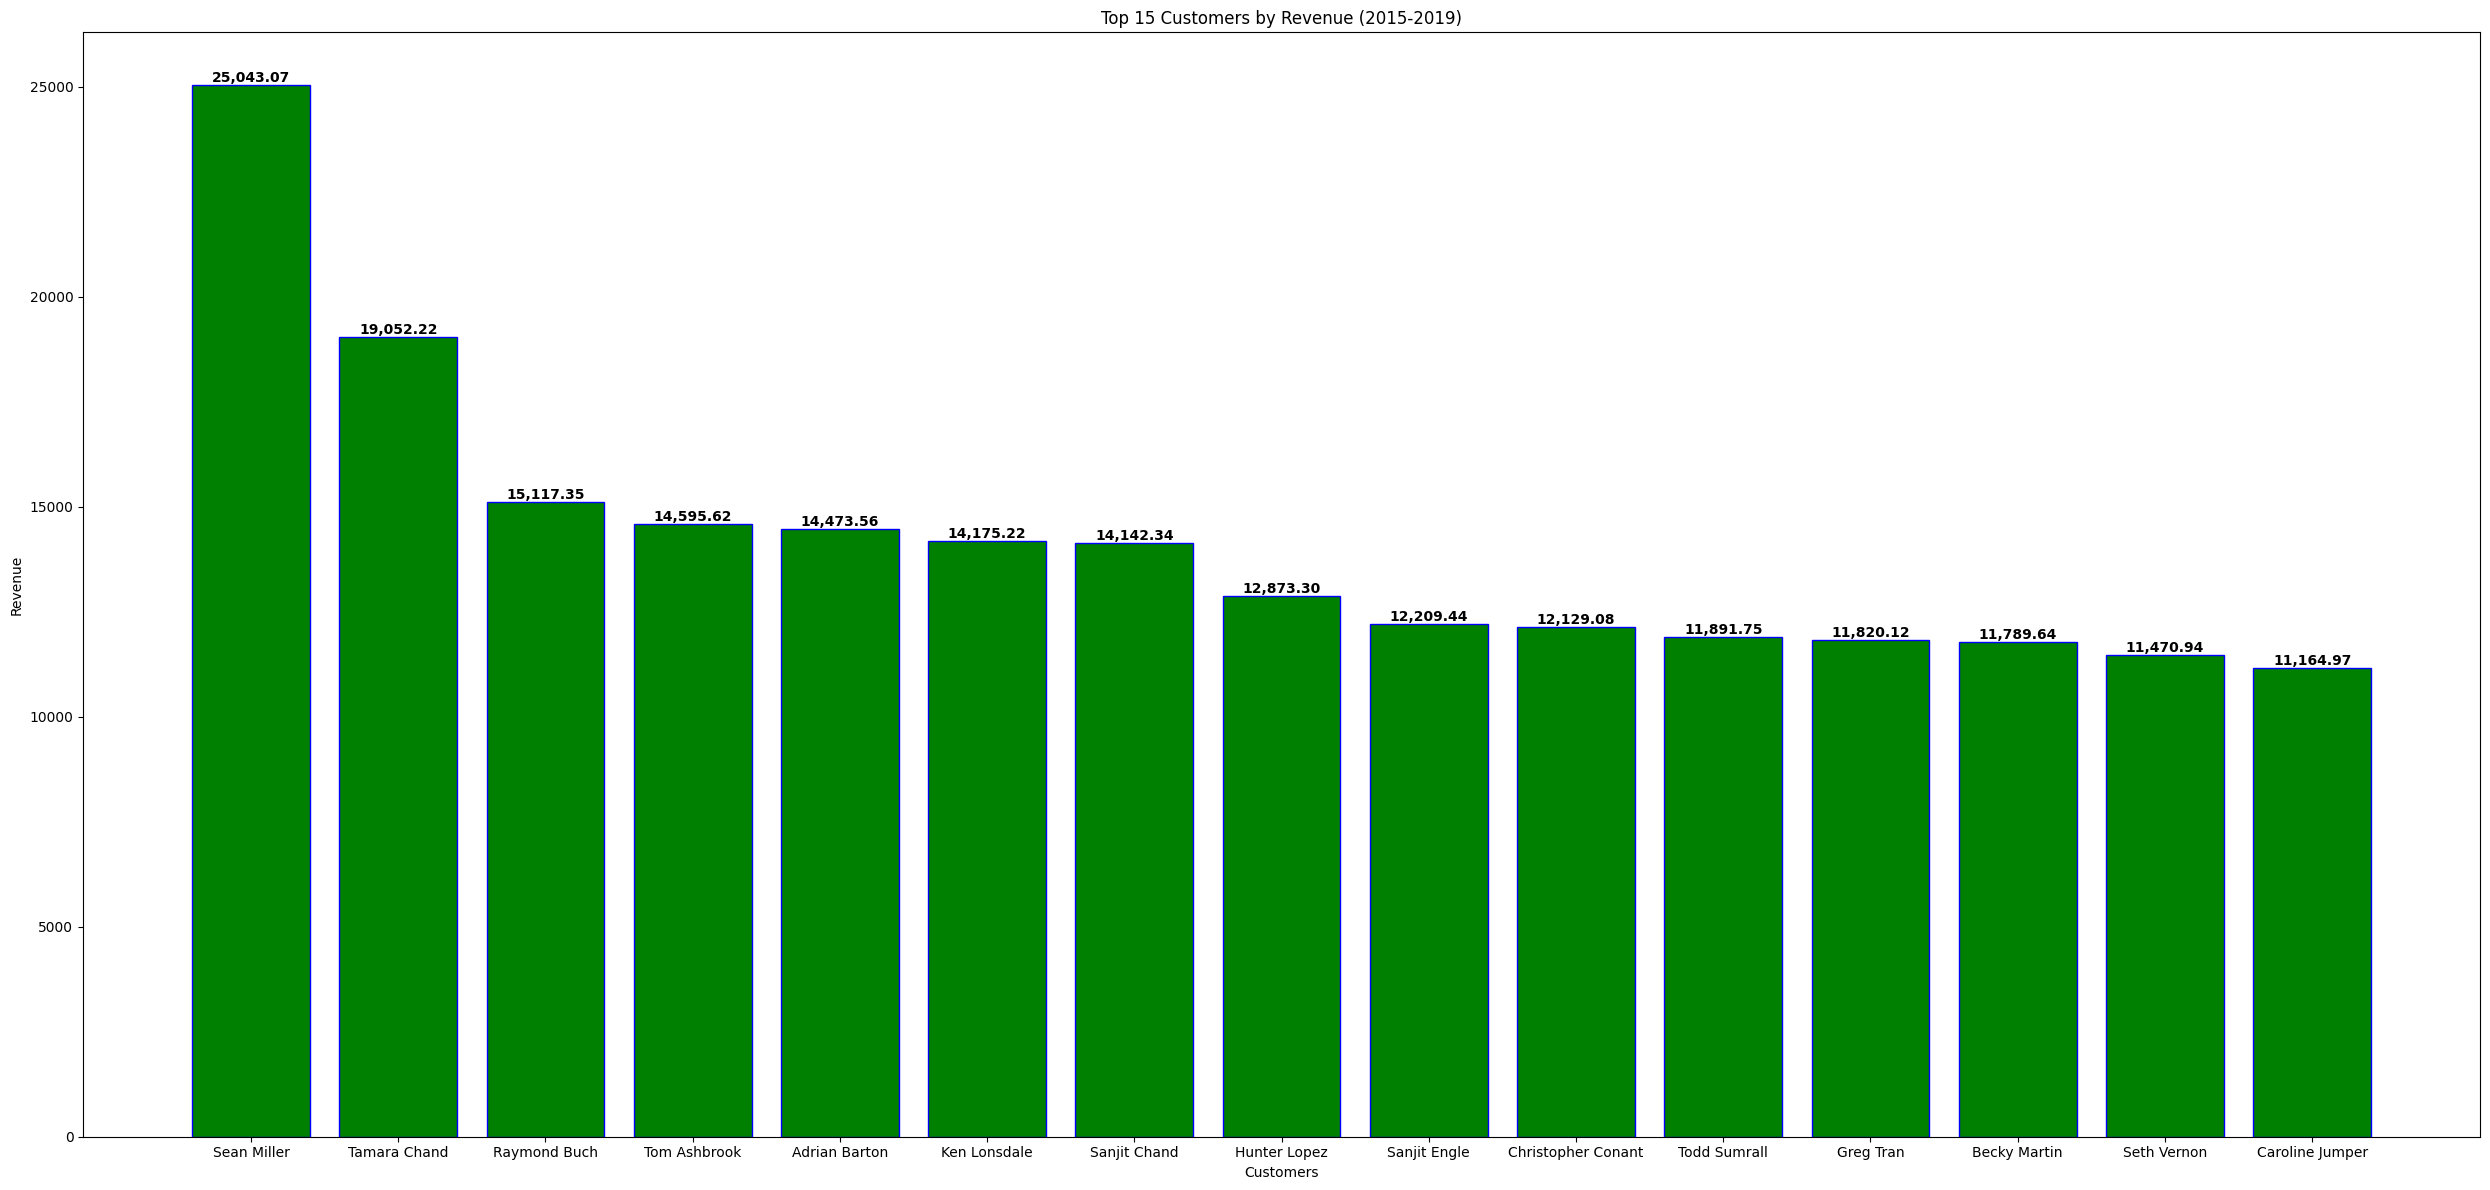

In [ ]:
top_customer = superstore_data.groupby(['Customer Name'])['Sales'].sum().sort_values(ascending=False).head(15).reset_index()

# create a bar chart
plt.figure(figsize=(25, 12))
bars = plt.bar(top_customer["Customer Name"], top_customer["Sales"], color='green', edgecolor='blue', linewidth=1)

# add text labels with the exact sales values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():,.2f}",
             ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# customize the graph
plt.title("Top 15 Customers by Revenue (2015-2019)")
plt.xlabel("Customers")  # x-axis shows the customers
plt.ylabel("Revenue")

plt.tight_layout()

States with high revenue

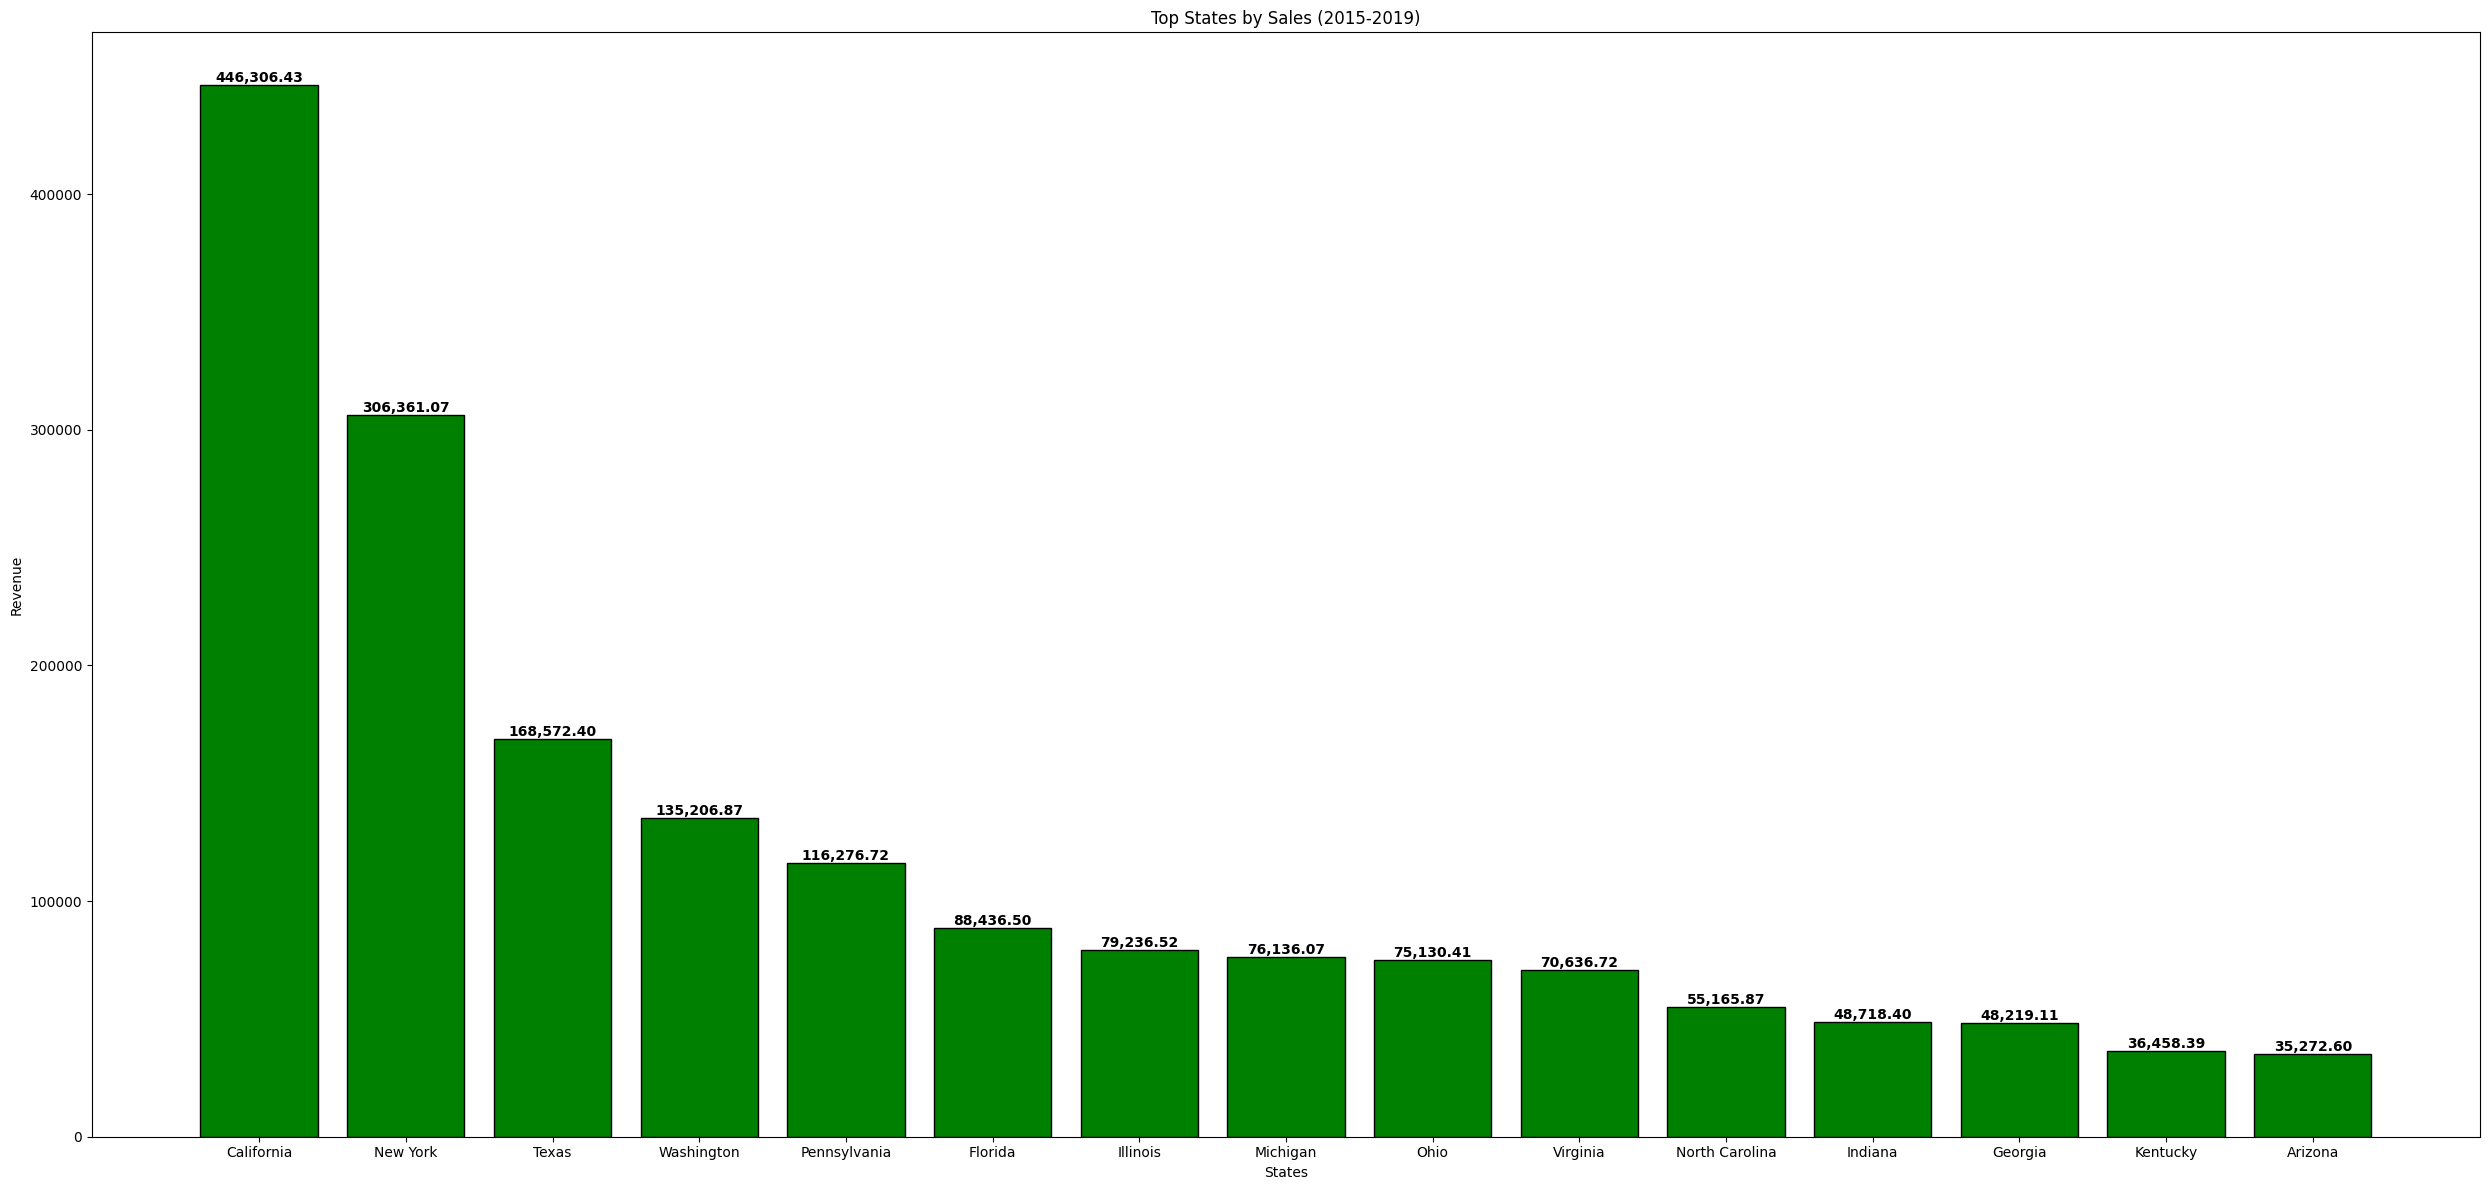

In [ ]:
top_state = superstore_data.groupby(['State'])['Sales'].sum().sort_values(ascending=False).head(15)
top_state = top_state.reset_index()

#create a bar chart
plt.figure(figsize=(25, 12))
bars = plt.bar(top_state["State"], top_state["Sales"], color='green', edgecolor='black', linewidth=1)

#add text labels with the exact sales values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():,.2f}",
             ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

#customize the graph
plt.title("Top States by Sales (2015-2019)")
plt.xlabel("States")
plt.ylabel("Revenue")

plt.tight_layout()

Revenue based on category

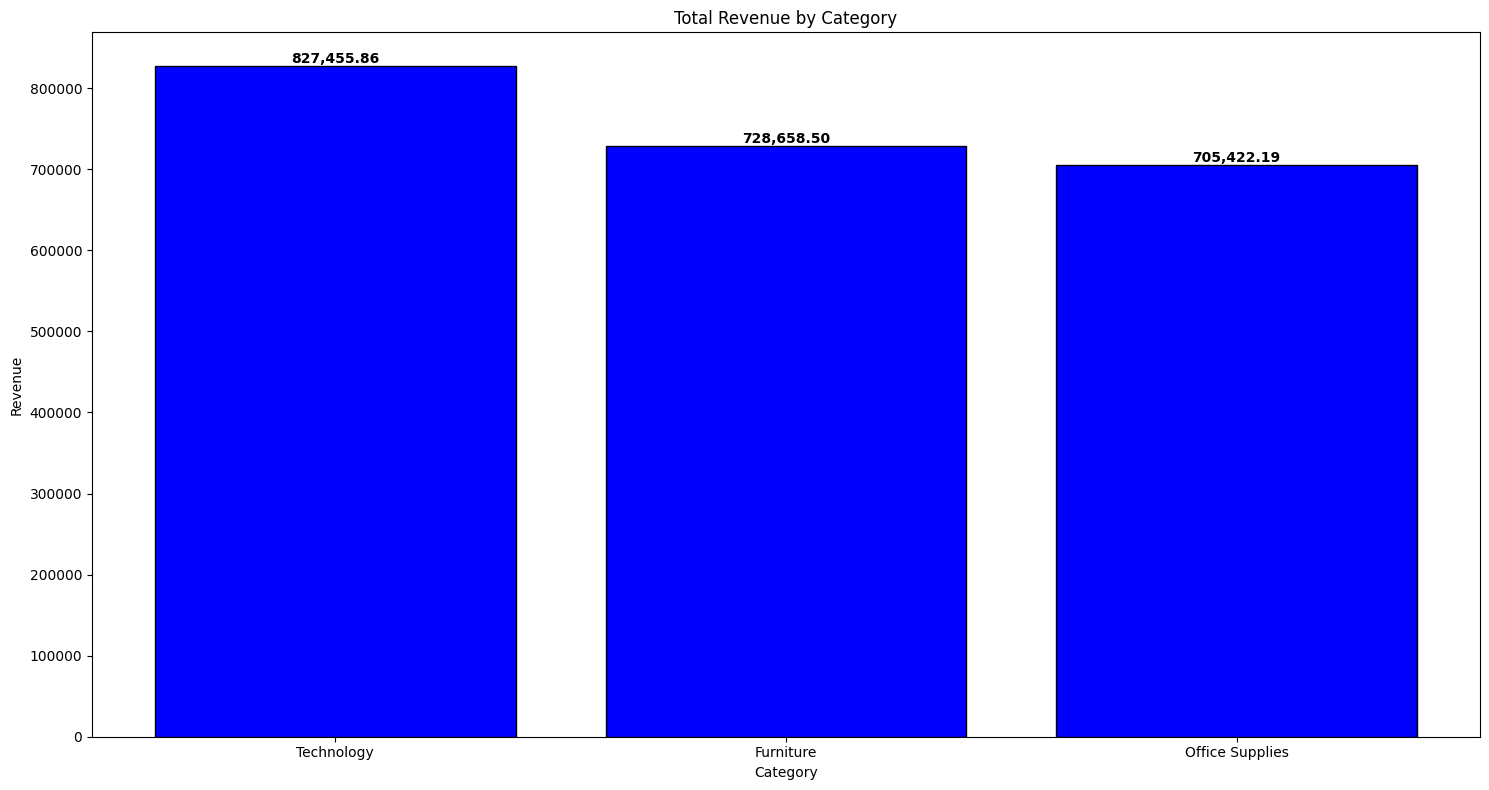

In [ ]:
category_revenue = superstore_data.groupby(['Category'])['Sales'].sum().sort_values(ascending=False)

# create a bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(category_revenue.index, category_revenue.values, color='blue', edgecolor='black', linewidth=1)

# add text labels with the exact revenue values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():,.2f}",
             ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# customize the graph
plt.title("Total Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")

# show graph
plt.tight_layout()

Revenue based on sub category

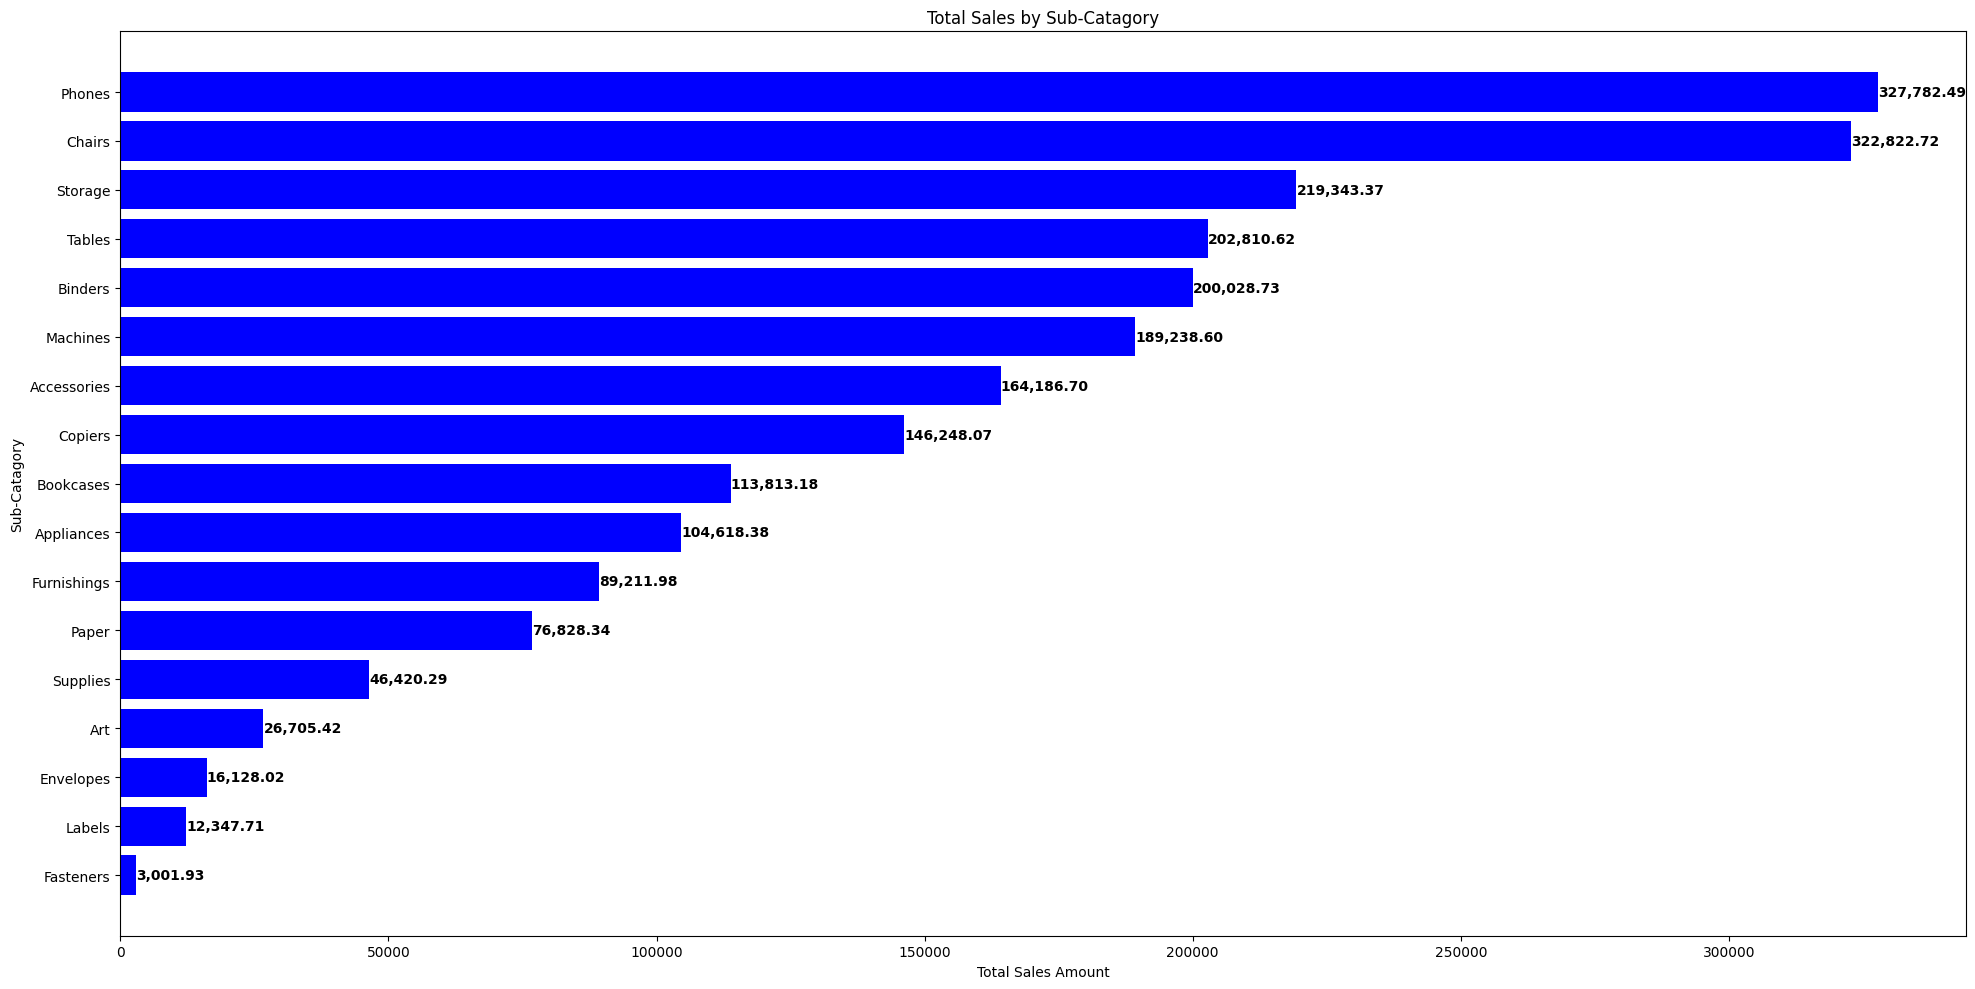

In [ ]:
product_sales= superstore_data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True)


plt.figure(figsize=(20,10))
bars=plt.barh(product_sales.index, product_sales.values, color='b')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{bar.get_width():,.2f}",
             va='center', color='black', fontsize=10, fontweight='bold')

plt.title('Total Sales by Sub-Catagory')
plt.xlabel('Total Sales Amount')
plt.ylabel('Sub-Catagory')

# Show plot
plt.tight_layout()
plt.show()


Most popular categories

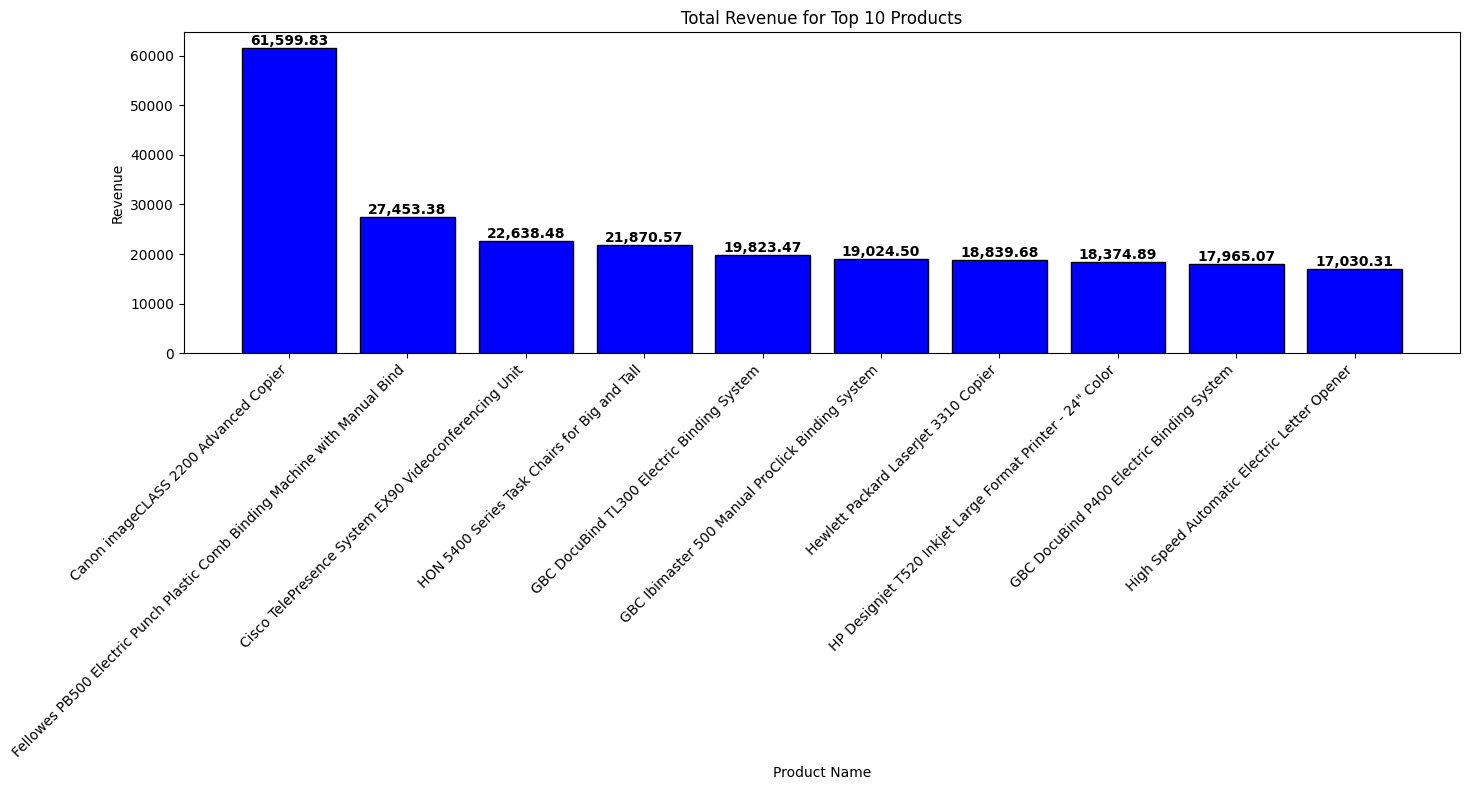

In [ ]:
top_products_revenue = superstore_data.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False).head(10)

# create q bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(top_products_revenue.index, top_products_revenue.values, color='blue', edgecolor='black', linewidth=1)

# qdd text labels with the exact revenue values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():,.2f}",
             ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# customize the graph
plt.title("Total Revenue for Top 10 Products")
plt.xlabel("Product Name")
plt.ylabel("Revenue")

plt.xticks(rotation=45, ha='right')

# show graph
plt.tight_layout()

Store revenue by month

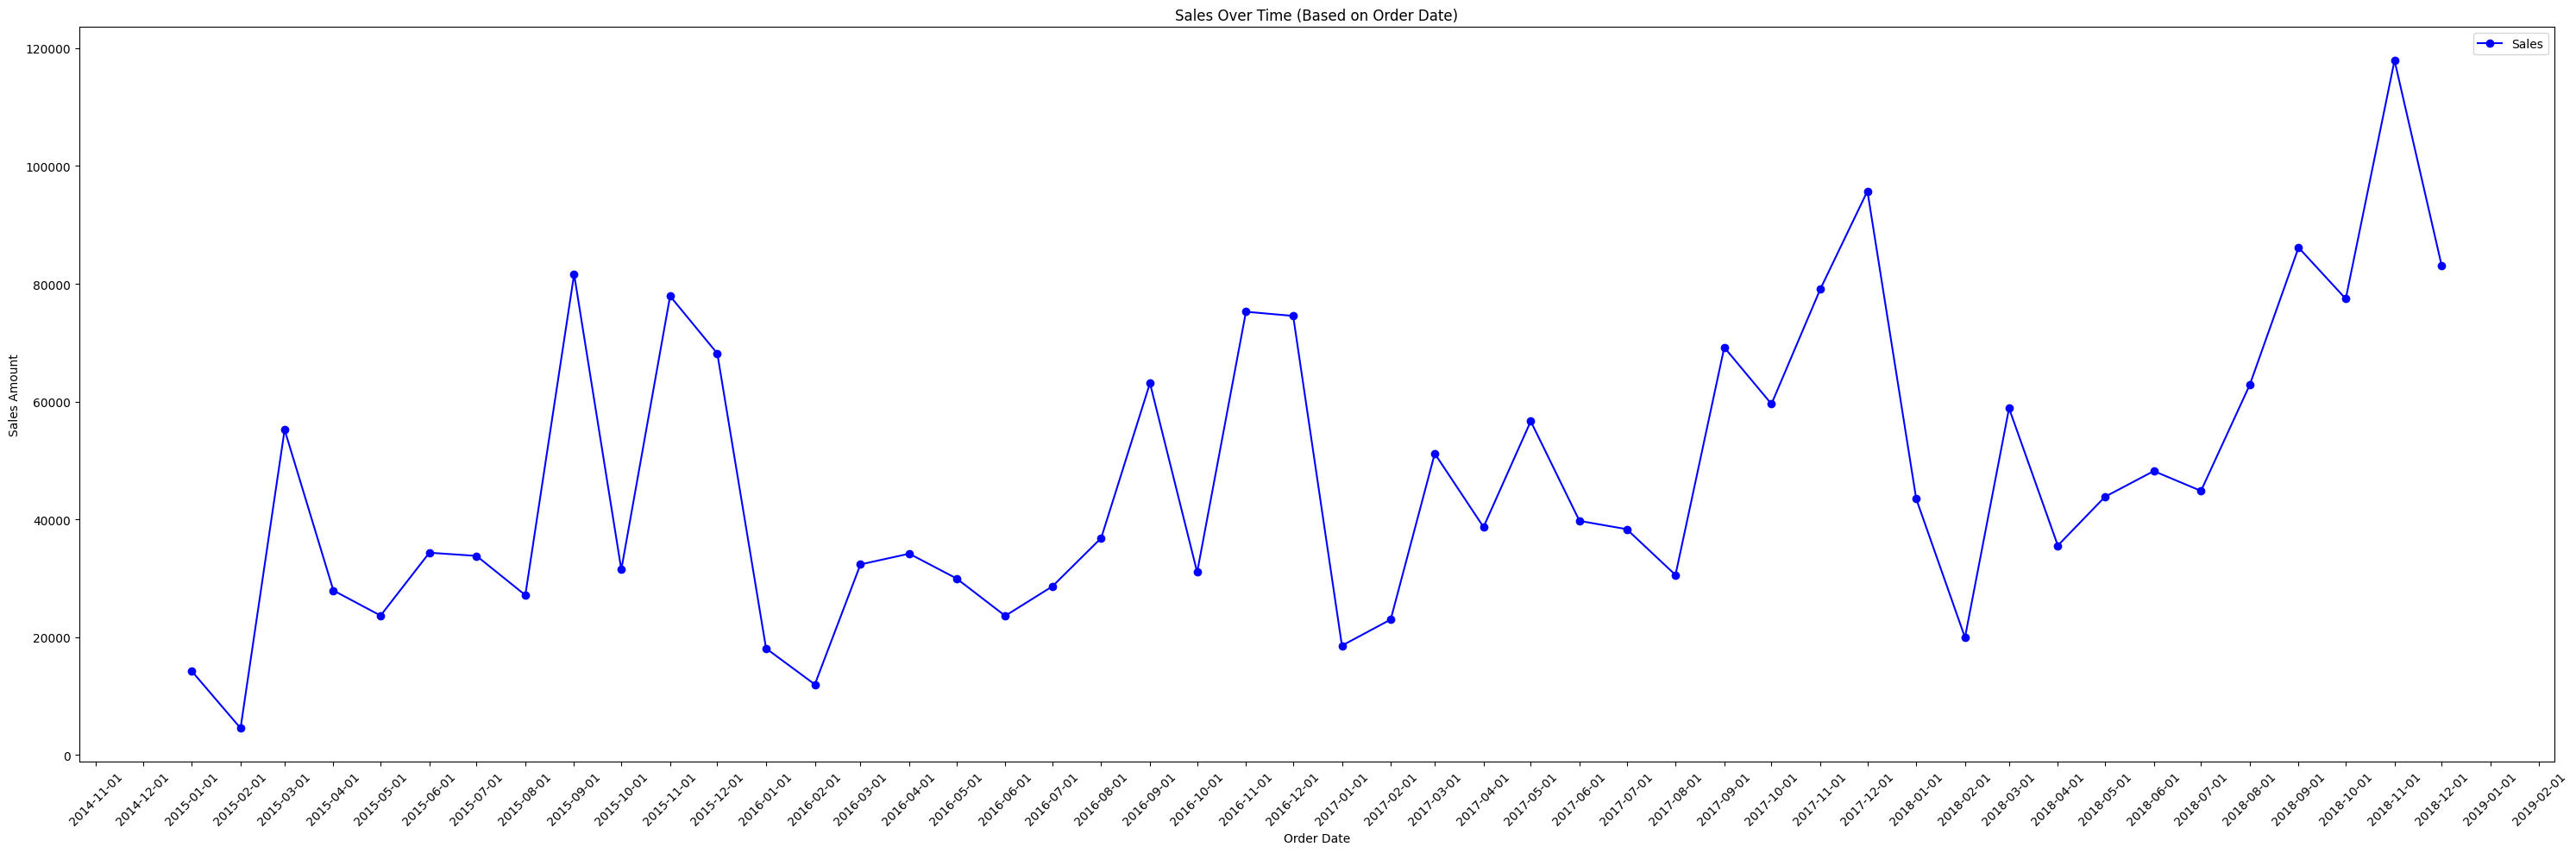

In [ ]:
superstore_data['Month']=superstore_data['Order Date'].dt.to_period('M')
grouped_sales = superstore_data.groupby(superstore_data['Order Date'].dt.to_period('M'))['Sales'].sum()

grouped_sales.index = grouped_sales.index.to_timestamp()
# create a line graph
plt.figure(figsize=(30, 10))
plt.plot(grouped_sales.index, grouped_sales.values, marker='o', linestyle='-', color='b', label='Sales')

# customize the graph
plt.title('Sales Over Time (Based on Order Date)')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.legend()

# format x-axis date labels
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())  # Show ticks for every month
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# show graph
plt.tight_layout()
plt.show()

Average order value by month

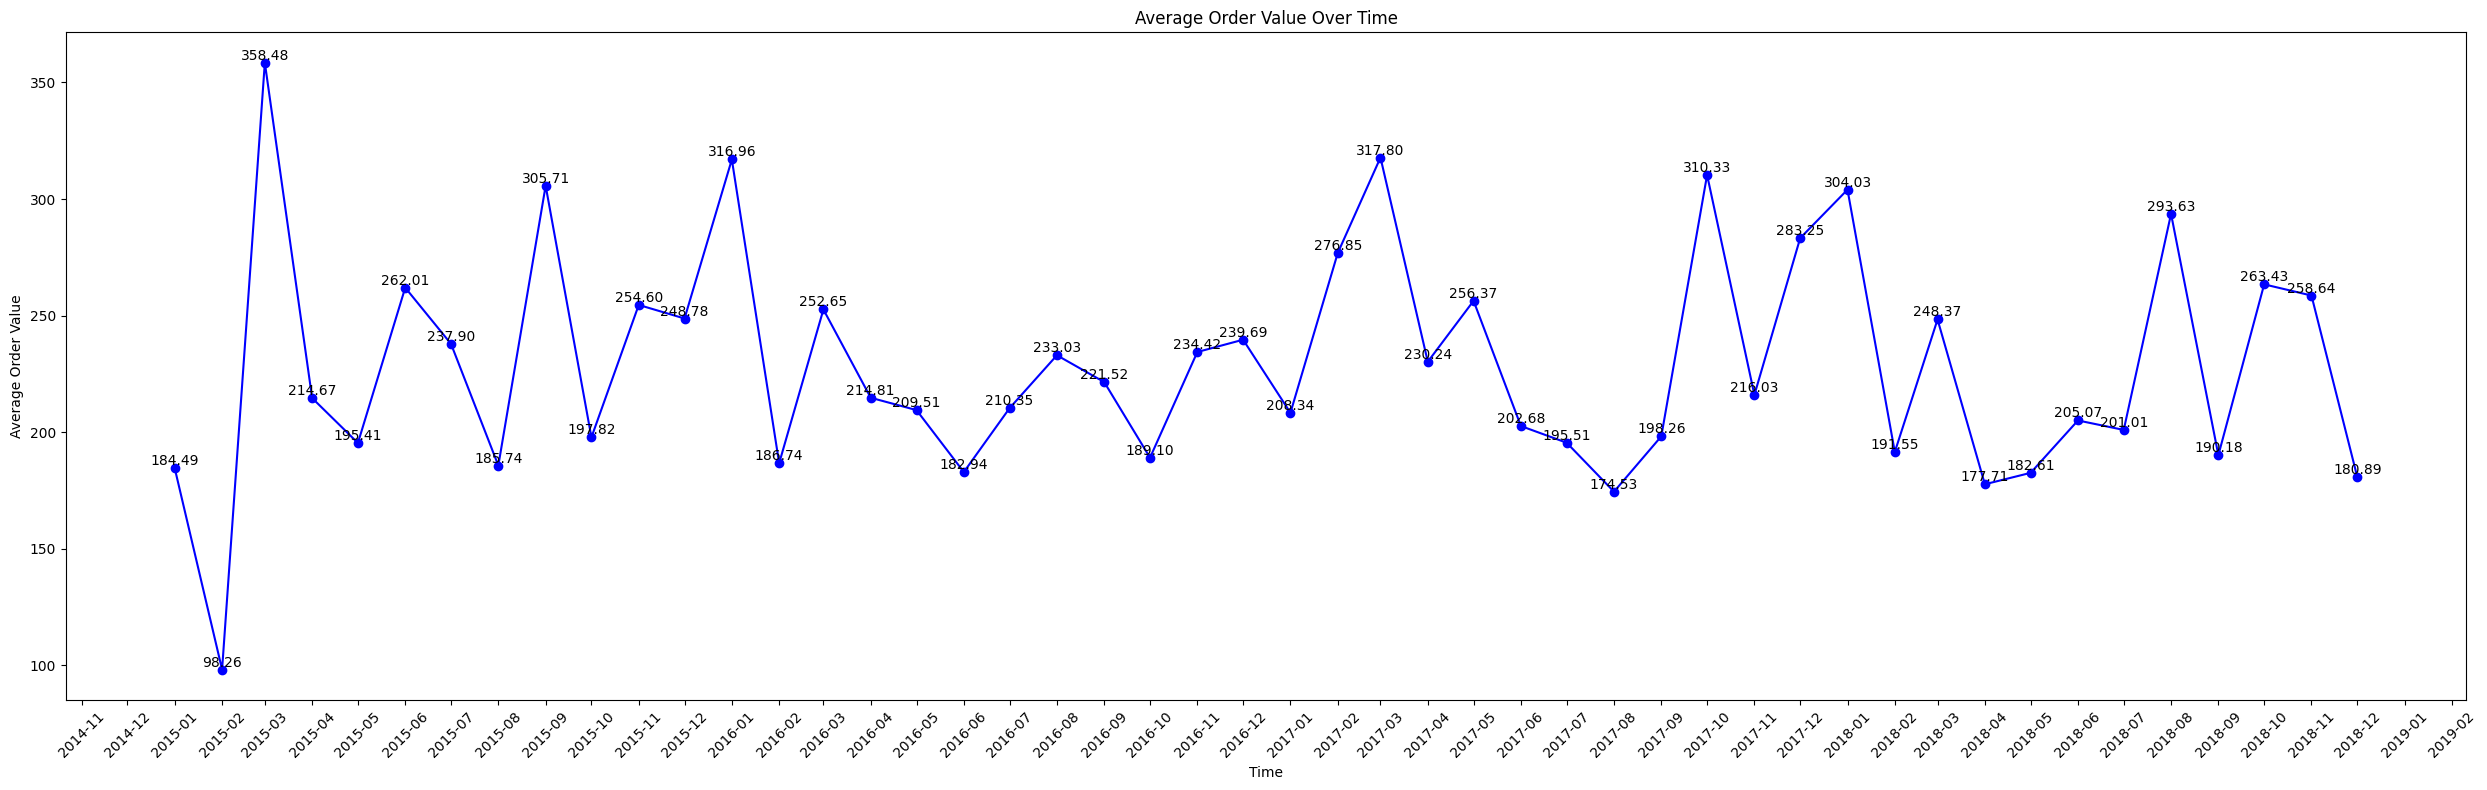

In [ ]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# calculate average order value for each month
average_order_values = superstore_data.groupby(superstore_data['Order Date'].dt.to_period('M'))['Sales'].mean()

# convert the period index to datetime
average_order_values.index = average_order_values.index.to_timestamp()

# create a line graph
plt.figure(figsize=(25, 8))
plt.plot(average_order_values.index, average_order_values.values, marker='o', linestyle='-', color='b', label='Average Order Value')

# add text labels with the exact average order value on top of each point
for x, y in zip(average_order_values.index, average_order_values.values):
    plt.text(x, y, f"{y:,.2f}", ha='center', va='bottom', color='black', fontsize=10)


# customize graph
plt.title('Average Order Value Over Time')
plt.xlabel('Time')
plt.ylabel('Average Order Value')

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()

# show graph
plt.show()

Conclusion
In this sales analysis project, I examined the Superstore dataset spanning from 2015 to 2019. My goal was to gain insights into the store's performance, customer behavior, and revenue trends. Here are some key findings and conclusions:

Revenue Growth : Over the course of my analysis, I observed a consistent upward trajectory in revenue, reflecting the store's overall prosperity. An unmistakable surge in sales was evident every November, which I would attributable to the Black Friday shopping frenzy. Conversely, there was a decline in January, post the holiday season.

Customer Segmentation : The dataset unveiled three primary customer segments: Consumer, Corporate, and Home Office. The Consumer segment emerged as the most dominant. Further exploration of the unique behaviors within each segment could yield valuable insights for crafting targeted marketing strategies.

Category Analysis: Within the product categories, Technology stood out as the top revenue generator, closely followed by Furniture and Office Supplies. Shifting focus to the Technology category and conducting a granular examination of its sub-categories could lead to more detailed strategies.

Identifying Valuable Customers: The identification of high-value customers is a pivotal aspect of customer retention and the implementation of personalized marketing strategies. I pinpointed the top customers who made substantial contributions to the store's revenue.

Average Order Value Stability: The average order value remained relatively consistent throughout the analyzed period, displaying minor fluctuations. This metric serves as a critical indicator for gauging customer spending patterns.

In conclusion, this analysis provides valuable insights into the Superstore's performance and offers actionable recommendations to enhance sales, customer satisfaction, and overall business success. Further exploration and implementation of these recommendations can contribute to sustained growth and profitability.